In [104]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
import matplotlib.pyplot as plt

In [105]:
df = pd.read_csv(r"D:\Kaggle\covid_related_disease_data.csv")

In [106]:
df.head(5)

,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,No,NaN,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,No,NaN,No,NaN,0,NaN,NaN,Healthcare,Never,21.9
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,No,NaN,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,Yes,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,No,NaN,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9


In [107]:
df.shape

(3000, 26)

In [108]:
df.dtypes

Patient_ID                   int64
Age                          int64
Gender                      object
Region                      object
Preexisting_Condition       object
Date_of_Infection           object
COVID_Strain                object
Symptoms                    object
Severity                    object
Hospitalized                object
Hospital_Admission_Date     object
Hospital_Discharge_Date     object
ICU_Admission               object
Ventilator_Support          object
Recovered                   object
Date_of_Recovery            object
Reinfection                 object
Date_of_Reinfection         object
Vaccination_Status          object
Vaccine_Type                object
Doses_Received               int64
Date_of_Last_Dose           object
Long_COVID_Symptoms         object
Occupation                  object
Smoking_Status              object
BMI                        float64
dtype: object

In [109]:
date_columns_to_convert = [
    'Date_of_Infection',
    'Hospital_Admission_Date',
    'Hospital_Discharge_Date',
    'Date_of_Recovery',
    'Date_of_Reinfection',
    'Date_of_Last_Dose'
]
for col in date_columns_to_convert:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [110]:
type(df)

pandas.core.frame.DataFrame

In [111]:
df.isnull().sum()*100/df.shape[0]

Patient_ID                  0.000000
Age                         0.000000
Gender                      0.000000
Region                      0.000000
Preexisting_Condition      15.633333
Date_of_Infection           0.000000
COVID_Strain                0.000000
Symptoms                    0.000000
Severity                    0.000000
Hospitalized                0.000000
Hospital_Admission_Date    70.800000
Hospital_Discharge_Date    70.800000
ICU_Admission               0.000000
Ventilator_Support          0.000000
Recovered                   0.000000
Date_of_Recovery           49.733333
Reinfection                 0.000000
Date_of_Reinfection        90.500000
Vaccination_Status          0.000000
Vaccine_Type               60.300000
Doses_Received              0.000000
Date_of_Last_Dose          50.933333
Long_COVID_Symptoms        92.666667
Occupation                  0.000000
Smoking_Status              0.000000
BMI                         0.000000
dtype: float64

In [112]:
#should replace with Unknown' -Preexisting_Condition
df ['Preexisting_Condition'].mean


<bound method Series.mean of 0              Obesity
1               Asthma
2         Hypertension
3               Asthma
4       Cardiovascular
             ...      
2995      Hypertension
2996           Obesity
2997    Cardiovascular
2998            Asthma
2999           Obesity
Name: Preexisting_Condition, Length: 3000, dtype: object>

In [113]:
#  Define the column(s) you want to impute and the new category name
column_to_impute = 'Preexisting_Condition'
new_category_name = 'Unknown' # Or 'Missing', 'Not Specified', etc.
# Perform the imputation using .fillna()
df[column_to_impute].fillna(new_category_name, inplace=True)

 <!-- droping columns which have less impact on prediction and high amount of null values
 null values - Hospital_Admission_Date ,Hospital_Discharge_Date,Date_of_Recovery ,Date_of_Reinfection  ,Date_of_Last_Dose,Long_COVID_Symptoms,vaccine type
less impact - Patient_ID ,Date_of_Infection ,Region ,Occupation
 -->

In [114]:

df = df.drop(['Hospital_Admission_Date', 
                           'Hospital_Discharge_Date',
                           'Date_of_Recovery',
                           'Date_of_Reinfection',
                           'Date_of_Last_Dose',
                           'Long_COVID_Symptoms',
                           # 'Vaccine_Type ',
                           'Patient_ID',
                           'Date_of_Infection'# concern
                           # 'Region',
                           # 'Occupation'
                           
                          ],axis=1)


In [115]:
df.head(5)

,Age,Gender,Region,Preexisting_Condition,COVID_Strain,Symptoms,Severity,Hospitalized,ICU_Admission,Ventilator_Support,Recovered,Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Occupation,Smoking_Status,BMI
0,69,Male,Hovedstaden,Obesity,Delta,Mild,Moderate,Yes,No,No,Yes,No,Yes,NaN,1,Healthcare,Never,27.7
1,38,Male,Sjælland,Asthma,XBB.1.5,Mild,Moderate,No,No,No,No,No,No,NaN,0,Healthcare,Never,21.9
2,41,Female,Syddanmark,Hypertension,Beta,Mild,High,Yes,Yes,Yes,No,No,Yes,Janssen,3,Unemployed,Never,22.7
3,81,Female,Hovedstaden,Asthma,Delta,Severe,High,No,No,No,Yes,Yes,Yes,AstraZeneca,1,Office Worker,Never,27.7
4,50,Female,Syddanmark,Cardiovascular,Delta,Mild,High,No,No,No,No,No,Yes,NaN,2,Student,Never,11.9


In [116]:
# Encode binary 'Yes'/'No' columns to 1/0 ---
binary_cols_to_convert = [
    'Hospitalized',
    'ICU_Admission',
    'Ventilator_Support',
    'Recovered',
    'Reinfection',
    'Vaccination_Status'
]
for col in binary_cols_to_convert:
    if col in df.columns:
        df[col] = np.where(df[col] == 'Yes', 1, 0).astype(int)
    else:
        print(f"Warning: Column '{col}' not found in DataFrame. Skipping.")


In [117]:
# Encode 'Gender' column to 1/0 ('Male' to 1, 'Female'/'Other' to 0) ---
if 'Gender' in df.columns:
    df['Gender'] = np.where(df['Gender'] == 'Male', 1, 0).astype(int)
else:
    print("Warning: 'Gender' column not found in DataFrame. Skipping encoding.")

In [118]:
#  Handle other categorical columns (Severity, Symptoms, Region, Occupation, COVID_Strain, Smoking_Status) ---
# Severity: Ordinal Encoding (assuming 'Low' to 'Critical' has an order)
if 'Severity' in df.columns:
    severity_order = ['Low', 'Mild', 'Moderate', 'High', 'Severe', 'Critical']
    # Create a mapping dictionary for encoding
    severity_mapping = {level: i for i, level in enumerate(severity_order)}
    df['Severity_Encoded'] = df['Severity'].map(severity_mapping)
    # Drop original 'Severity' column after encoding
    df.drop('Severity', axis=1, errors='ignore', inplace=True)
else:
    print("Warning: 'Severity' column not found in DataFrame. Skipping encoding.")

In [119]:
# One-Hot Encode other nominal categorical features
# Identify categorical columns that are still objects and are not Severity (which is handled)
nominal_categorical_cols = df.select_dtypes(include='object').columns.tolist()

In [120]:
# Exclude 'Severity' if it somehow still exists as an object and is not being dropped
if 'Severity' in nominal_categorical_cols:
    nominal_categorical_cols.remove('Severity')


print("\nColumns to One-Hot Encode:", nominal_categorical_cols)

if len(nominal_categorical_cols) > 0:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    encoded_features = encoder.fit_transform(df[nominal_categorical_cols])
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(nominal_categorical_cols), index=df.index)
    df.drop(columns=nominal_categorical_cols, axis=1, inplace=True)
    df = pd.concat([df, encoded_df], axis=1)
else:
    print("No nominal categorical columns found for One-Hot Encoding.")


Columns to One-Hot Encode: ['Region', 'Preexisting_Condition', 'COVID_Strain', 'Symptoms', 'Vaccine_Type', 'Occupation', 'Smoking_Status']


In [121]:
features = df.drop (['Hospitalized'],axis =1)
labels   = df ['Hospitalized']
train_features,test_features, \
train_labels,test_labels =train_test_split(features,labels,test_size =0.2,
                                           random_state=54545)

In [122]:
train_features

,Age,Gender,ICU_Admission,Ventilator_Support,Recovered,Reinfection,Vaccination_Status,Doses_Received,BMI,Severity_Encoded,...,Vaccine_Type_nan,Occupation_Driver,Occupation_Healthcare,Occupation_Office Worker,Occupation_Student,Occupation_Teacher,Occupation_Unemployed,Smoking_Status_Current,Smoking_Status_Former,Smoking_Status_Never
2040,33,1,0,0,1,0,0,0,35.5,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
401,68,1,0,0,1,0,0,0,21.4,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
709,22,0,0,0,1,0,0,0,19.2,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
830,56,0,0,0,1,0,1,2,29.7,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2857,74,0,0,0,0,0,1,3,17.4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878,31,1,0,0,0,0,1,2,25.2,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2956,18,0,0,0,1,0,1,3,27.3,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1173,88,0,0,0,1,0,0,0,19.4,2,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
856,29,1,0,0,1,0,0,0,20.7,3,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [123]:
min_max_scaler =MinMaxScaler()
train_features_scaled = min_max_scaler.fit_transform(train_features)
test_features_scaled  = min_max_scaler.transform(test_features)

In [124]:
from sklearn.neighbors import KNeighborsClassifier

In [125]:
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(train_features_scaled,train_labels)

KNeighborsClassifier(n_neighbors=2)

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def performance(test_labels, predictions):
    acc = accuracy_score(test_labels, predictions)
    pre = precision_score(test_labels, predictions)
    rec = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    print(f"Accuracy :{acc}\nPrecision: {pre}\nRecall : {rec}\nF1 : {f1}")
    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) # Assuming model.classes_ is defined elsewhere
    disp.plot(cmap=plt.cm.Blues)

# Example usage (assuming test_labels, predictions, and model are defined)
# performance(test_labels, predictions)

Accuracy :0.6916666666666667
Precision: 0.525
Recall : 0.11229946524064172
F1 : 0.18502202643171806


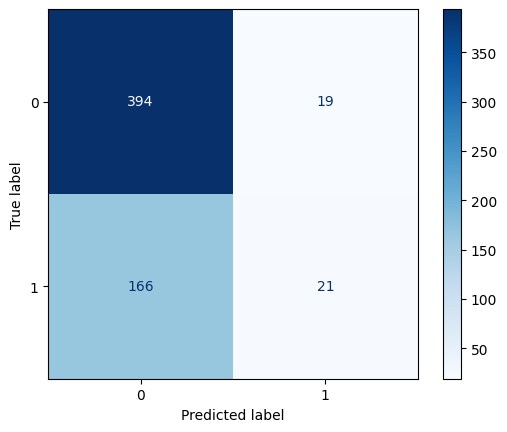

In [131]:
performance(test_labels,predictions)

In [132]:
model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='lbfgs')

In [133]:
# Train the model
print("\nTraining the Logistic Regression model...")
model.fit(train_features_scaled,train_labels)
print("Model training complete.")


Training the Logistic Regression model...
Model training complete.


C:\Users\DELL\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [134]:
predictions = model.predict(test_features_scaled)

In [135]:

def performance(test_labels, predictions):
    acc = accuracy_score(test_labels, predictions)
    pre = precision_score(test_labels, predictions)
    rec = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    print(f"Accuracy :{acc}\nPrecision: {pre}\nRecall : {rec}\nF1 : {f1}")
    cm = confusion_matrix(test_labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_) # Assuming model.classes_ is defined elsewhere
    disp.plot(cmap=plt.cm.Blues)

# Example usage (assuming test_labels, predictions, and model are defined)
# performance(test_labels, predictions)

Accuracy :0.75
Precision: 1.0
Recall : 0.19786096256684493
F1 : 0.33035714285714285


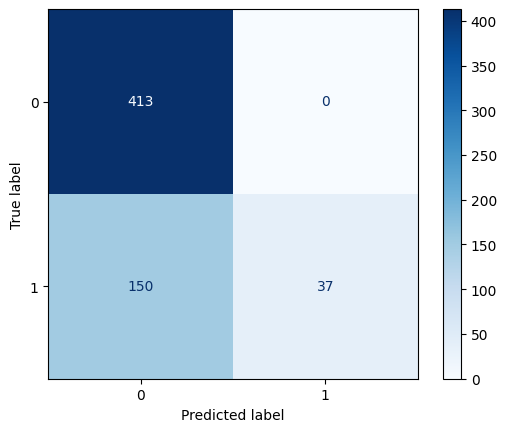

In [136]:
performance(test_labels,predictions)

In [140]:
from sklearn.tree import DecisionTreeClassifier

In [141]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(train_features_scaled,train_labels)

DecisionTreeClassifier(max_depth=3)

Accuracy :0.75
Precision: 1.0
Recall : 0.19786096256684493
F1 : 0.33035714285714285


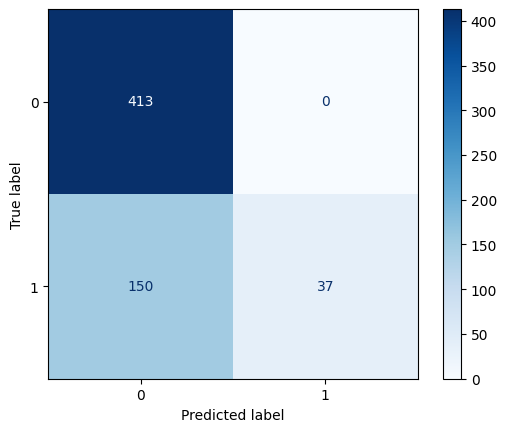

In [142]:
predictions = model.predict(test_features_scaled)
performance(test_labels,predictions)

In [145]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [154]:
from sklearn import tree
import matplotlib.pyplot as plt

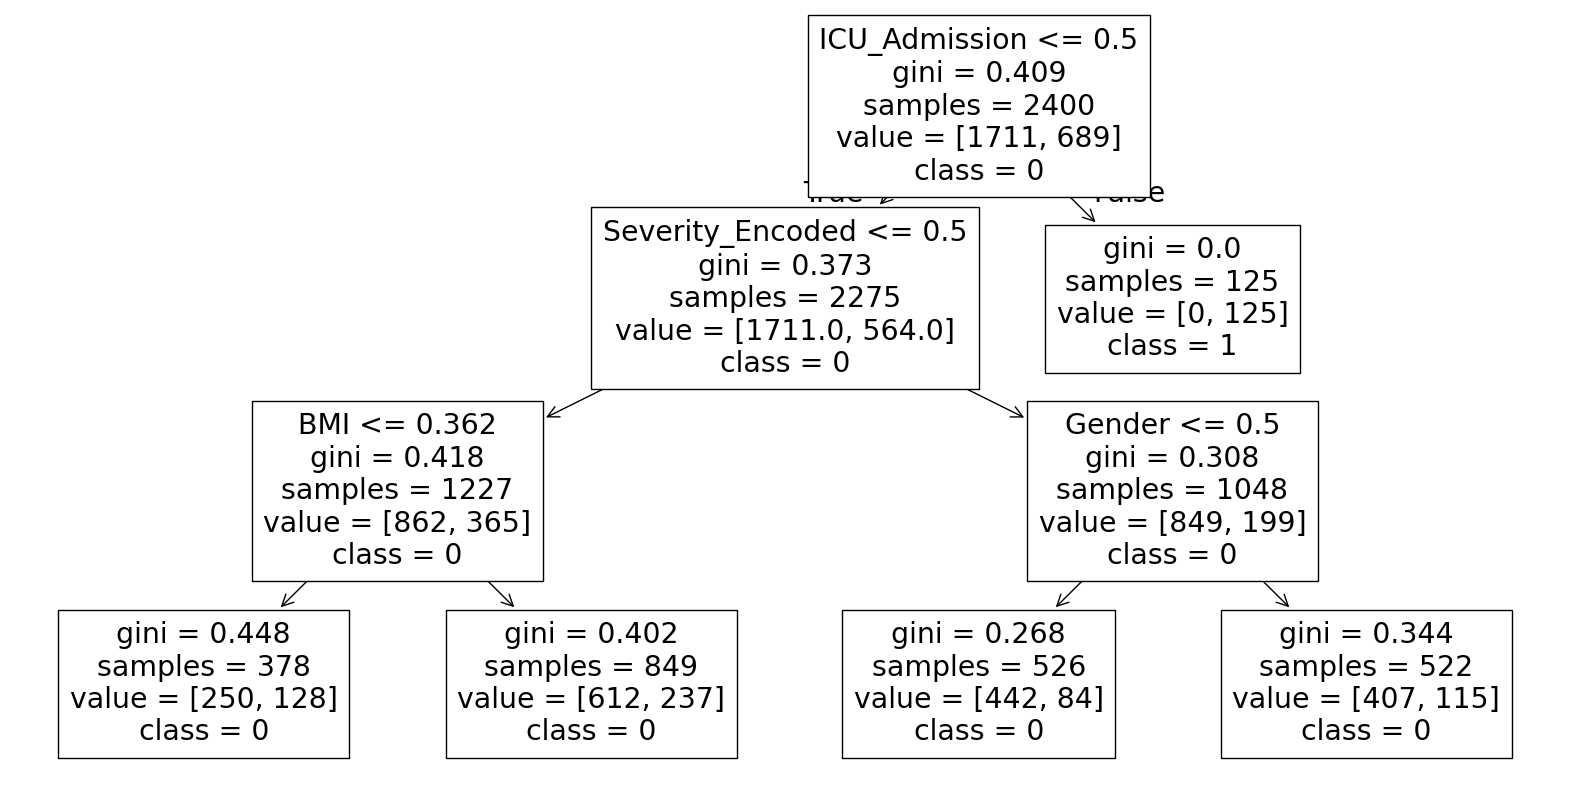

In [155]:
fix, ax =plt.subplots(1,1, figsize=(20,10))
_ = tree.plot_tree(
    model,
    feature_names = features.columns.tolist(),
    class_names = ['0','1']
)

In [151]:
from sklearn.ensemble import RandomForestClassifier #bagging
import xgboost #boost
import catboost
# import lightgbm


In [153]:
# !pip install lightbgm
!pip install xgboost

In [156]:
model_RF = RandomForestClassifier()
model_XGB = xgboost.XGBClassifier()
model_CAT =catboost.CatBoostClassifier()

In [157]:
model_RF.fit(train_features_scaled,train_labels)
model_XGB.fit(train_features_scaled,train_labels)
model_CAT.fit(train_features_scaled,train_labels)

Learning rate set to 0.014972
0:	learn: 0.6870633	total: 98.5ms	remaining: 1m 38s
1:	learn: 0.6816907	total: 103ms	remaining: 51.4s
2:	learn: 0.6760273	total: 108ms	remaining: 36s
3:	learn: 0.6706154	total: 115ms	remaining: 28.6s
4:	learn: 0.6657070	total: 119ms	remaining: 23.8s
5:	learn: 0.6608207	total: 124ms	remaining: 20.5s
6:	learn: 0.6560440	total: 130ms	remaining: 18.4s
7:	learn: 0.6516722	total: 137ms	remaining: 16.9s
8:	learn: 0.6470329	total: 143ms	remaining: 15.8s
9:	learn: 0.6431721	total: 149ms	remaining: 14.7s
10:	learn: 0.6392633	total: 154ms	remaining: 13.9s
11:	learn: 0.6355380	total: 160ms	remaining: 13.2s
12:	learn: 0.6318105	total: 164ms	remaining: 12.4s
13:	learn: 0.6281640	total: 169ms	remaining: 11.9s
14:	learn: 0.6254947	total: 174ms	remaining: 11.4s
15:	learn: 0.6227811	total: 179ms	remaining: 11s
16:	learn: 0.6194775	total: 183ms	remaining: 10.6s
17:	learn: 0.6162649	total: 188ms	remaining: 10.3s
18:	learn: 0.6132193	total: 191ms	remaining: 9.87s
19:	learn: 0.

Accuracy :0.7516666666666667
Precision: 1.0
Recall : 0.20320855614973263
F1 : 0.3377777777777778
Accuracy :0.6883333333333334
Precision: 0.5
Recall : 0.2727272727272727
F1 : 0.35294117647058826
Accuracy :0.745
Precision: 0.8695652173913043
Recall : 0.21390374331550802
F1 : 0.34334763948497854


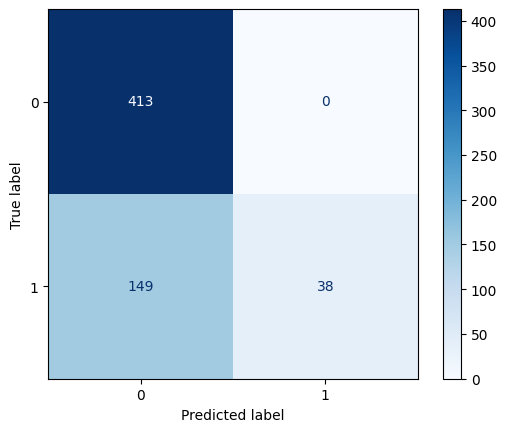

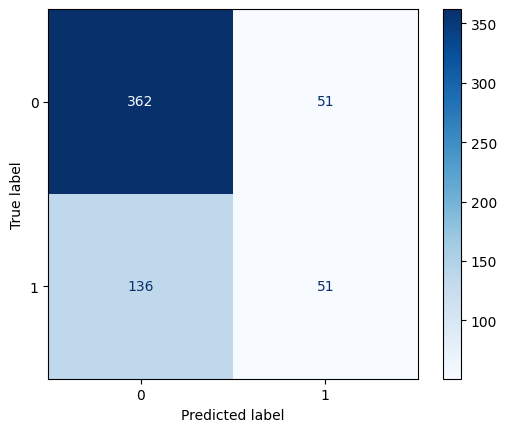

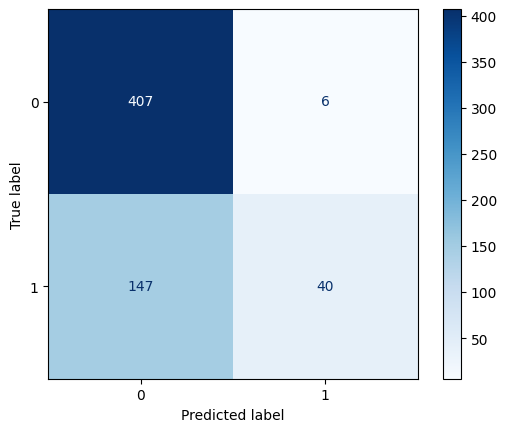

In [158]:
predictions = model_RF.predict(test_features_scaled)
performance(test_labels,predictions)

predictions = model_XGB.predict(test_features_scaled)
performance(test_labels,predictions)

predictions = model_CAT.predict(test_features_scaled)
performance(test_labels,predictions)